## Wrangling and analyzing twitter data

In [1]:
#import packages required for the entire analysis
import pandas as pd
import numpy as np
import requests as rq
import matplotlib.pyplot as plt


In [2]:
#reading csv file from twitter-arvhive-enhanced.csv to the dataframe df'
df=pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#printing first few lines of the datafram
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
#fetching image predictions data in the form of tsv file from the http address 
r=rq.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [5]:
#reading predictions file data into a data frame
df_predictions=pd.read_table(r.url,sep='\t')

In [6]:
#printin first few lines of the dataframe just loaded
df_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
#connecting to twitter api
import tweepy

consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)



In [9]:
api = tweepy.API(auth_handler=auth, 
                 wait_on_rate_limit=True, 
                 wait_on_rate_limit_notify=True)

In [10]:
#fetching data from api for each tweet_id 
tweet_ids = list(df.tweet_id)

tweet_data = {}
for tweet in tweet_ids:
    try:
        tweet_status = api.get_status(tweet,
                                      wait_on_rate_limit=True, 
                                      wait_on_rate_limit_notify=True)
        tweet_data[str(tweet)] = tweet_status._json
    except: 
        print("Error for: " + str(tweet))

Error for: 888202515573088257
Error for: 873697596434513921
Error for: 872668790621863937
Error for: 872261713294495745
Error for: 869988702071779329
Error for: 866816280283807744
Error for: 861769973181624320
Error for: 856602993587888130
Error for: 851953902622658560
Error for: 845459076796616705
Error for: 844704788403113984
Error for: 842892208864923648
Error for: 837366284874571778
Error for: 837012587749474308
Error for: 829374341691346946
Error for: 827228250799742977
Error for: 812747805718642688
Error for: 802247111496568832
Error for: 779123168116150273
Error for: 775096608509886464
Error for: 771004394259247104
Error for: 770743923962707968
Error for: 759566828574212096


Rate limit reached. Sleeping for: 160


Error for: 754011816964026368
Error for: 680055455951884288


Rate limit reached. Sleeping for: 82


In [15]:
import json

#dumping the read data into a csv file
with open('tweet_json.txt', 'w') as outfile:  
    json.dump(tweet_data, outfile, 
              sort_keys = True,
              indent=4,
              ensure_ascii = True)

In [16]:
#reading the csv file into a datafram
df_tweet = pd.read_json('tweet_json.txt',orient='index')


In [17]:
#printing first few lines of the dataframe
df_tweet.head()

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1991-02-08 13:48:08.022790149,NaN,NaN,2015-11-15 22:32:08+00:00,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/BL...,2446,False,NaN,666020888022790149,666020888022790144,...,NaN,NaN,NaN,469,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,False,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 16:08:05.002620928,NaN,NaN,2015-11-15 23:05:30+00:00,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/r7...,120,False,NaN,666029285002620928,666029285002620928,...,NaN,NaN,NaN,43,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,False,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 17:16:52.701032449,NaN,NaN,2015-11-15 23:21:54+00:00,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/y6...,114,False,NaN,666033412701032449,666033412701032448,...,NaN,NaN,NaN,41,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,False,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 20:17:06.329800704,NaN,NaN,2015-11-16 00:04:52+00:00,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/DW...,274,False,NaN,666044226329800704,666044226329800704,...,NaN,NaN,NaN,133,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,False,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 21:40:48.165822465,NaN,NaN,2015-11-16 00:24:50+00:00,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/4B...,99,False,NaN,666049248165822465,666049248165822464,...,NaN,NaN,NaN,41,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,False,"{'contributors_enabled': False, 'created_at': ..."


## Assessing data

After gathering data it needs to be assessed visually and programmically for any quality and tidiness issues.

### Twitter archive dataframe

In [18]:
#examining the struncture of the dataframe df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [19]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Quality issues

* There are wrong names in the name column which might have happened while extracting the name of the dog from the tweet.
* There are records with retweet status id which are retweets and not the original ones which is irrelevant.
* There are unwanted columns which are not needed for analysis.

#### Tidiness issues

* Looking at the datatypes of the dataframe we can see that the id columns are interpreted as float and integer which should be actually object datatpe.
* Timestamp column is interpreted as object datatype which should be better if it is in date format.
* Dog stage does not need four different columns 



   

In [20]:
#making a copy of the original dataframe where the cleaned data will be stored
df_clean=df.copy()
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [21]:
#dropping records which have not null retweet status id which are the retweets
df_clean.drop(df_clean[df_clean['retweeted_status_id'].isnull()==False].index,inplace=True)


In [22]:
#examining the structure of the dataframe
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

In [23]:
#renaming name column values which starts with lower case characters as 'none' because those are not actually names
df_clean.loc[df_clean['name'].str.islower(),'name'] = None



In [24]:
#printing first few lines after the cleaning process
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [25]:
#combining unnecessary columns into one column 
df_clean['stage'] = df[['doggo', 'floofer','pupper','puppo']].apply(lambda x: ''.join(x), axis=1)

df_clean['stage'].replace("NoneNoneNoneNone","None ", inplace=True)
df_clean['stage'].replace("doggoNoneNoneNone","doggo", inplace=True)
df_clean['stage'].replace("NoneflooferNoneNone","floofer", inplace=True)
df_clean['stage'].replace("NoneNonepupperNone","pupper", inplace=True)
df_clean['stage'].replace("NoneNoneNonepuppo","puppo", inplace=True)
df_clean['stage'].replace("doggoNonepupperNone","None", inplace=True)
df_clean['stage'].replace("doggoNoneNonepuppo","None", inplace=True)
df_clean['stage'].replace("doggoflooferNoneNone","None", inplace=True)





In [26]:
#printing first few columns of the cleaned dataframe
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,None


In [27]:
#converting tweet_id column to string datatype
df_clean['tweet_id'] = df_clean.tweet_id.astype(str)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2071 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
stage                         2175 no

In [28]:
#converting timestamp column to datetime datatype
df_clean['timestamp']=pd.to_datetime(df_clean['timestamp'], format='%Y-%m-%d %H:%M')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns, UTC]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2071 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
stage                   

In [29]:
#dropping columns which are not necessary for analysis
df_clean.drop(['retweeted_status_user_id',
               'retweeted_status_id',
               'retweeted_status_timestamp',
               'in_reply_to_status_id',
               'in_reply_to_user_id',
               'in_reply_to_status_id',
               'expanded_urls',
               'source',
               'doggo',
               'floofer',
               'pupper',
               'puppo',
               'text'], axis=1,inplace=True)

In [30]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 6 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns, UTC]
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2071 non-null object
stage                 2175 non-null object
dtypes: datetime64[ns, UTC](1), int64(2), object(3)
memory usage: 118.9+ KB


In [31]:
#creating copy of the predictions dataframe where we will store the cleaned dataframe
df_predictions_clean=df_predictions.copy()

In [32]:
df_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [33]:
df_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Quality issues

* p1,p2 and p3 columns have _ between names.  
* The names are not consistent. Some names are capitalized and some are not.

#### Tidiness issues

* Looking at the datatypes of the dataframe we can see that the tweet_id column is interpreted as integer which should be actually object datatpe.


In [34]:
df_predictions_clean['p1_dog'].unique()

array([ True, False])

In [35]:
#replacing _ in between names in p1,p2 & p3 columns
df_predictions_clean['p1'] = df_predictions_clean['p1'].str.replace('_', ' ')
df_predictions_clean['p2'] = df_predictions_clean['p2'].str.replace('_', ' ')
df_predictions_clean['p3'] = df_predictions_clean['p3'].str.replace('_', ' ')



In [36]:
#captializing the first letter of each word in the name columns
df_predictions_clean['p1'] = df_predictions_clean['p1'].str.title()
df_predictions_clean['p2'] = df_predictions_clean['p2'].str.title()
df_predictions_clean['p3'] = df_predictions_clean['p3'].str.title()


In [37]:
#converting tweet_id column to string datatype
df_predictions_clean['tweet_id'] = df_predictions_clean.tweet_id.astype(str)

In [38]:
df_predictions_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True


In [39]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2331 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2331 non-null datetime64[ns, UTC]
entities                         2331 non-null object
extended_entities                1816 non-null object
favorite_count                   2331 non-null int64
favorited                        2331 non-null bool
geo                              0 non-null float64
id                               2331 non-null int64
id_str                           2331 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null float64
is_quote_status                

In [40]:
df_tweet.head()

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1991-02-08 13:48:08.022790149,NaN,NaN,2015-11-15 22:32:08+00:00,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/BL...,2446,False,NaN,666020888022790149,666020888022790144,...,NaN,NaN,NaN,469,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,False,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 16:08:05.002620928,NaN,NaN,2015-11-15 23:05:30+00:00,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/r7...,120,False,NaN,666029285002620928,666029285002620928,...,NaN,NaN,NaN,43,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,False,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 17:16:52.701032449,NaN,NaN,2015-11-15 23:21:54+00:00,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/y6...,114,False,NaN,666033412701032449,666033412701032448,...,NaN,NaN,NaN,41,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,False,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 20:17:06.329800704,NaN,NaN,2015-11-16 00:04:52+00:00,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/DW...,274,False,NaN,666044226329800704,666044226329800704,...,NaN,NaN,NaN,133,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,False,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 21:40:48.165822465,NaN,NaN,2015-11-16 00:24:50+00:00,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/4B...,99,False,NaN,666049248165822465,666049248165822464,...,NaN,NaN,NaN,41,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,False,"{'contributors_enabled': False, 'created_at': ..."


#### Quality issues

* There are records with retweet status id which are retweets and not the original ones which is irrelevant.

#### Tidiness issues

* Looking at the datatypes of the dataframe we can see that the id column is interpreted as integer which should be actually object datatpe.

In [41]:
#making a copy of the original dataframe where we will store the cleaned data
df_tweet_clean=df_tweet.copy()



In [42]:
#replacing column name 'id' with 'tweet_id' so that the column name will be same across all three data frames
df_tweet_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

In [43]:
#converting tweet_id datatype to string
df_tweet_clean.tweet_id = df_tweet_clean.tweet_id.astype(str)

In [44]:
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2331 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2331 non-null datetime64[ns, UTC]
entities                         2331 non-null object
extended_entities                1816 non-null object
favorite_count                   2331 non-null int64
favorited                        2331 non-null bool
geo                              0 non-null float64
tweet_id                         2331 non-null object
id_str                           2331 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null float64
is_quote_status               

In [45]:
#dropping records for which the retweet status id is not null that those records that are retweets
df_tweet_clean.drop(df_tweet_clean[df_tweet_clean['retweeted_status'].isnull()==False].index,inplace=True)

In [46]:
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2168 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2168 non-null datetime64[ns, UTC]
entities                         2168 non-null object
extended_entities                1744 non-null object
favorite_count                   2168 non-null int64
favorited                        2168 non-null bool
geo                              0 non-null float64
tweet_id                         2168 non-null object
id_str                           2168 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null float64
is_quote_status               

In [47]:
#dropping unwanted columns from the dataframe that are not required for analysis
df_tweet_clean.drop(['contributors',
                     'coordinates',
                     'created_at',
                     'entities',
                     'extended_entities',
                     'favorited',
                     'geo',
                     'id_str',
                     'in_reply_to_screen_name',
                     'in_reply_to_status_id',
                     'in_reply_to_status_id_str',
                     'in_reply_to_user_id',
                     'in_reply_to_user_id_str',
                     'is_quote_status',
                     'lang',
                     'place',
                     'possibly_sensitive',
                     'possibly_sensitive_appealable',
                     'quoted_status',
                     'quoted_status_id',
                     'quoted_status_id_str',
                     'retweeted',
                     'retweeted_status',
                     'source',
                     'truncated',
                     'user'], axis=1,inplace=True)



In [48]:
df_tweet_clean.head()

,favorite_count,tweet_id,retweet_count,text
1991-02-08 13:48:08.022790149,2446,666020888022790149,469,Here we have a Japanese Irish Setter. Lost eye...
1991-02-08 16:08:05.002620928,120,666029285002620928,43,This is a western brown Mitsubishi terrier. Up...
1991-02-08 17:16:52.701032449,114,666033412701032449,41,Here is a very happy pup. Big fan of well-main...
1991-02-08 20:17:06.329800704,274,666044226329800704,133,This is a purebred Piers Morgan. Loves to Netf...
1991-02-08 21:40:48.165822465,99,666049248165822465,41,Here we have a 1949 1st generation vulpix. Enj...


In [49]:
#combining all three dataframes into one dataframe using inner join based on tweet_id

df_combined = pd.merge(df_clean, df_predictions_clean,on='tweet_id', how='inner')

df_combined = pd.merge(df_combined, df_tweet_clean,on='tweet_id', how='inner')




In [50]:
df_combined.head(5)

,tweet_id,timestamp,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,text
0,892420643555336193,2017-08-01 16:23:56+00:00,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,36596,7789,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,2017-08-01 00:17:27+00:00,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,31526,5769,This is Tilly. She's just checking pup on you....
2,891815181378084864,2017-07-31 00:18:03+00:00,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,23751,3818,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,2017-07-30 15:58:51+00:00,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False,39905,7952,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,2017-07-29 16:00:24+00:00,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True,38097,8594,This is Franklin. He would like you to stop ca...


### Storing, Analyzing, and Visualizing Data

In [51]:
#storing the combined dataframe into a csv file
df_combined.to_csv('twitter_archive_master.csv')


In [52]:
#reading the csv file into a dataframe
df_twitter_archive_master=pd.read_csv('twitter_archive_master.csv')

In [53]:
df_twitter_archive_master

,Unnamed: 0,tweet_id,timestamp,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,p1,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,text
0,0,892420643555336193,2017-08-01 16:23:56+00:00,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,...,False,Bagel,0.085851,False,Banana,0.076110,False,36596,7789,This is Phineas. He's a mystical boy. Only eve...
1,1,892177421306343426,2017-08-01 00:17:27+00:00,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,...,True,Pekinese,0.090647,True,Papillon,0.068957,True,31526,5769,This is Tilly. She's just checking pup on you....
2,2,891815181378084864,2017-07-31 00:18:03+00:00,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,...,True,Malamute,0.078253,True,Kelpie,0.031379,True,23751,3818,This is Archie. He is a rare Norwegian Pouncin...
3,3,891689557279858688,2017-07-30 15:58:51+00:00,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper Towel,...,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False,39905,7952,This is Darla. She commenced a snooze mid meal...
4,4,891327558926688256,2017-07-29 16:00:24+00:00,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,...,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True,38097,8594,This is Franklin. He would like you to stop ca...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,1982,666049248165822465,2015-11-16 00:24:50+00:00,5,10,None,None,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,...,True,Rottweiler,0.243682,True,Doberman,0.154629,True,99,41,Here we have a 1949 1st generation vulpix. Enj...
1983,1983,666044226329800704,2015-11-16 00:04:52+00:00,6,10,NaN,None,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,...,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True,274,133,This is a purebred Piers Morgan. Loves to Netf...
1984,1984,666033412701032449,2015-11-15 23:21:54+00:00,9,10,NaN,None,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,...,True,Malinois,0.138584,True,Bloodhound,0.116197,True,114,41,Here is a very happy pup. Big fan of well-main...
1985,1985,666029285002620928,2015-11-15 23:05:30+00:00,7,10,NaN,None,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,...,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True,120,43,This is a western brown Mitsubishi terrier. Up...


In [54]:
df_twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 21 columns):
Unnamed: 0            1987 non-null int64
tweet_id              1987 non-null int64
timestamp             1987 non-null object
rating_numerator      1987 non-null int64
rating_denominator    1987 non-null int64
name                  1889 non-null object
stage                 1987 non-null object
jpg_url               1987 non-null object
img_num               1987 non-null int64
p1                    1987 non-null object
p1_conf               1987 non-null float64
p1_dog                1987 non-null bool
p2                    1987 non-null object
p2_conf               1987 non-null float64
p2_dog                1987 non-null bool
p3                    1987 non-null object
p3_conf               1987 non-null float64
p3_dog                1987 non-null bool
favorite_count        1987 non-null int64
retweet_count         1987 non-null int64
text                  1987 non-null object


In [55]:
#dropping unwanter junk column
df_twitter_archive_master.drop(['Unnamed: 0'],axis=1,inplace=True)

In [56]:
#converting tweet_id datatype to string
df_twitter_archive_master.tweet_id = df_twitter_archive_master.tweet_id.astype(str)

In [57]:
df_twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 20 columns):
tweet_id              1987 non-null object
timestamp             1987 non-null object
rating_numerator      1987 non-null int64
rating_denominator    1987 non-null int64
name                  1889 non-null object
stage                 1987 non-null object
jpg_url               1987 non-null object
img_num               1987 non-null int64
p1                    1987 non-null object
p1_conf               1987 non-null float64
p1_dog                1987 non-null bool
p2                    1987 non-null object
p2_conf               1987 non-null float64
p2_dog                1987 non-null bool
p3                    1987 non-null object
p3_conf               1987 non-null float64
p3_dog                1987 non-null bool
favorite_count        1987 non-null int64
retweet_count         1987 non-null int64
text                  1987 non-null object
dtypes: bool(3), float64(3), int64(5), ob

In [58]:
#compute descriptive statistics for all the available columns
df_twitter_archive_master.describe()

,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count
count,1987.000000,1987.000000,1987.000000,1987.000000,1.987000e+03,1.987000e+03,1987.000000,1987.000000
mean,12.280825,10.533971,1.203322,0.593317,1.344725e-01,6.037114e-02,8364.697031,2485.926019
std,41.570741,7.333532,0.561369,0.271959,1.005706e-01,5.091543e-02,12307.582214,4447.401324
min,0.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,72.000000,11.000000
25%,10.000000,10.000000,1.000000,0.361531,5.409535e-02,1.624950e-02,1797.500000,556.000000
50%,11.000000,10.000000,1.000000,0.587342,1.175080e-01,4.953060e-02,3787.000000,1203.000000
75%,12.000000,10.000000,1.000000,0.844583,1.950575e-01,9.180755e-02,10405.500000,2826.000000
max,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,158085.000000,78760.000000


### Which image is least rated one?

In [59]:

df_twitter_archive_master[df_twitter_archive_master['rating_numerator']==1]



,tweet_id,timestamp,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,text
1512,675153376133427200,2015-12-11 03:21:23+00:00,1,10,None,None,https://pbs.twimg.com/media/CV6gaUUWEAAnETq.jpg,1,Paper Towel,0.327957,False,Mailbox,0.096027,False,Seat Belt,0.034995,False,6181,2530,What kind of person sends in a picture without...
1728,670783437142401025,2015-11-29 01:56:48+00:00,1,10,None,None,https://pbs.twimg.com/media/CU8Z-OxXAAA-sd2.jpg,1,Lacewing,0.381955,False,Sulphur Butterfly,0.106810,False,Leafhopper,0.068347,False,806,376,Flamboyant pup here. Probably poisonous. Won't...
1893,667549055577362432,2015-11-20 03:44:31+00:00,1,10,None,None,https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg,1,Electric Fan,0.984377,False,Spotlight,0.007737,False,Lampshade,0.001901,False,5601,2179,Never seen dog like this. Breathes heavy. Tilt...
1966,666287406224695296,2015-11-16 16:11:11+00:00,1,2,NaN,None,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1,Maltese Dog,0.857531,True,Toy Poodle,0.063064,True,Miniature Poodle,0.025581,True,138,62,This is an Albanian 3 1/2 legged Episcopalian...
1969,666104133288665088,2015-11-16 04:02:55+00:00,1,10,None,None,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,Hen,0.965932,False,Cock,0.033919,False,Partridge,0.000052,False,13571,6041,Not familiar with this breed. No tail (weird)....


In [60]:
df_twitter_archive_master[(df_twitter_archive_master['tweet_id']=='666287406224695296') & (df_twitter_archive_master['favorite_count']==149)].jpg_url

Series([], Name: jpg_url, dtype: object)

Above jpg link shows the dog that is rated very low.

### Which image is most rated one?

In [61]:
df_twitter_archive_master[df_twitter_archive_master['rating_numerator']==1776]

,tweet_id,timestamp,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,text
720,749981277374128128,2016-07-04 15:00:45+00:00,1776,10,Atticus,None,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,Bow Tie,0.533941,False,Sunglasses,0.080822,False,Sunglass,0.050776,False,5194,2491,This is Atticus. He's quite simply America af....


In [62]:
df_twitter_archive_master[df_twitter_archive_master['tweet_id']=='749981277374128128'].jpg_url

720    https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg
Name: jpg_url, dtype: object

Above image shows the most rated dog image. 

What are the most recent 5 tweets?

In [63]:
    df_twitter_archive_master.sort_values(by=['timestamp'],ascending=False).head(5)

,tweet_id,timestamp,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,text
0,892420643555336193,2017-08-01 16:23:56+00:00,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,36596,7789,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,2017-08-01 00:17:27+00:00,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,31526,5769,This is Tilly. She's just checking pup on you....
2,891815181378084864,2017-07-31 00:18:03+00:00,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,23751,3818,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,2017-07-30 15:58:51+00:00,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False,39905,7952,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,2017-07-29 16:00:24+00:00,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True,38097,8594,This is Franklin. He would like you to stop ca...


Above results show the most recent five tweets.

What are the top most favourite tweets?


In [64]:
df_twitter_archive_master.sort_values(by=['favorite_count'],ascending=False).head(5)

,tweet_id,timestamp,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,text
769,744234799360020481,2016-06-18 18:26:18+00:00,13,10,None,doggo,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,Labrador Retriever,0.825333,True,Ice Bear,0.044681,False,Whippet,0.018442,True,158085,78760,Here's a doggo realizing you can stand in a po...
305,822872901745569793,2017-01-21 18:26:02+00:00,13,10,None,puppo,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,Lakeland Terrier,0.196015,True,Labrador Retriever,0.160329,True,Irish Terrier,0.069126,True,134740,44407,Here's a super supportive puppo participating ...
396,807106840509214720,2016-12-09 06:17:20+00:00,13,10,Stephan,None,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,Toy Terrier,0.077008,True,122059,57449,This is Stephan. He just wants to help. 13/10 ...
107,866450705531457537,2017-05-22 00:28:40+00:00,13,10,Jamesy,pupper,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,2,French Bulldog,0.905334,True,Boston Bull,0.078060,True,Pug,0.001771,True,117619,33342,This is Jamesy. He gives a kiss to every other...
804,739238157791694849,2016-06-04 23:31:25+00:00,13,10,None,doggo,https://pbs.twimg.com/ext_tw_video_thumb/73923...,1,Eskimo Dog,0.503372,True,Siberian Husky,0.390413,True,Malamute,0.080901,True,116753,58404,Here's a doggo blowing bubbles. It's downright...


The above results show the most favorite tweets.

### Which are the dogs that are most favorited ones?

In [65]:
df_twitter_archive_master.groupby(['p1']).mean()['favorite_count'].sort_values(ascending=False).head(5)



p1
Laptop       62741.0
Angora       43937.0
Limousine    43868.0
Conch        43509.0
Fountain     42195.0
Name: favorite_count, dtype: float64

Above results show the dogs which are most favorited.

### Which are the dogs that are having most retweet counts?


In [66]:
df_twitter_archive_master.groupby(['p1']).mean()['retweet_count'].sort_values(ascending=False).head(5)

p1
Arabian Camel    18187.0
Conch            17756.0
Upright          16596.0
Bubble           15491.0
Gondola          14928.5
Name: retweet_count, dtype: float64

The above results show dogs that have most retweet counts.

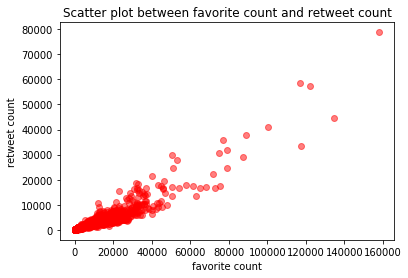

In [67]:
# scatter plot showing relationship between favorite count and retweet count
plt.scatter(x=df_twitter_archive_master['favorite_count'],y=df_twitter_archive_master['retweet_count'],c='red',alpha=.5)
plt.title('Scatter plot between favorite count and retweet count')
plt.xlabel('favorite count')
plt.ylabel('retweet count')
plt.show()

From the above plot we can see that the favorite count and retweet count has a positive correlation between them.

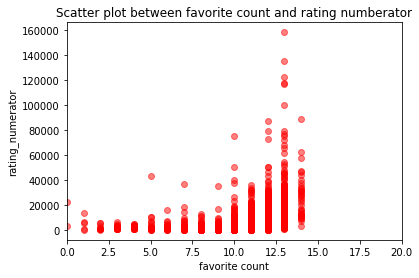

In [68]:
#scatter plot showing relationship between favorite count and rating numberator
plt.scatter(x=df_twitter_archive_master['rating_numerator'],y=df_twitter_archive_master['favorite_count'],c='red',alpha=.5)
plt.title('Scatter plot between favorite count and rating numberator')
plt.xlim(0,20)
plt.xlabel('favorite count')
plt.ylabel('rating_numerator')
plt.show()

From the above plot we can see that the tweets with higher favorite count are associated with higher rating.

## References

https://stackoverflow.com/questions/21608228/conditional-replace-pandas

http://www.datasciencemadesimple.com/check-lower-cases-column-dataframe-python/

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html

https://stackoverflow.com/questions/33098383/merge-multiple-column-values-into-one-column-in-python-pandas

https://stackoverflow.com/questions/31888871/pandas-replacing-column-values

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.replace.html

https://stackoverflow.com/questions/39141856/capitalize-first-letter-of-each-word-in-the-column-python

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html